Task 3: Heart Disease Prediction

Objective:

Build a model to predict whether a person is at risk of heart disease based on their health data.
Dataset:

Heart Disease UCI Dataset (available on Kaggle)

Instructions:

● Clean the dataset (handle missing values if any).

● Perform Exploratory Data Analysis (EDA) to understand trends.

● Train a classification model (Logistic Regression or Decision Tree).

● Evaluate using metrics: accuracy, ROC curve, and confusion matrix.

● Highlight important features affecting prediction.


Skills:

● Binary classification

● Medical data understanding and interpretation

● Model evaluation using ROC-AUC and confusion matrix

● Feature importance analysis


✅ Scaler saved as scaler.pkl


Epoch 1/100


7/7 [==============================] - 7s 116ms/step - loss: 2.1636 - accuracy: 0.4648 - val_loss: 2.1236 - val_accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 2.0832 - accuracy: 0.4695 - val_loss: 2.0407 - val_accuracy: 0.3750
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 2.0075 - accuracy: 0.4930 - val_loss: 1.9659 - val_accuracy: 0.3750
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 1.9373 - accuracy: 0.5305 - val_loss: 1.8970 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 1.8731 - accuracy: 0.5681 - val_loss: 1.8336 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 1.8133 - accuracy: 0.5962 - val_loss: 1.7738 - val_accuracy: 0.5417
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 1.7561 - accuracy: 0.6244 - val_loss: 1.7182 - val_ac

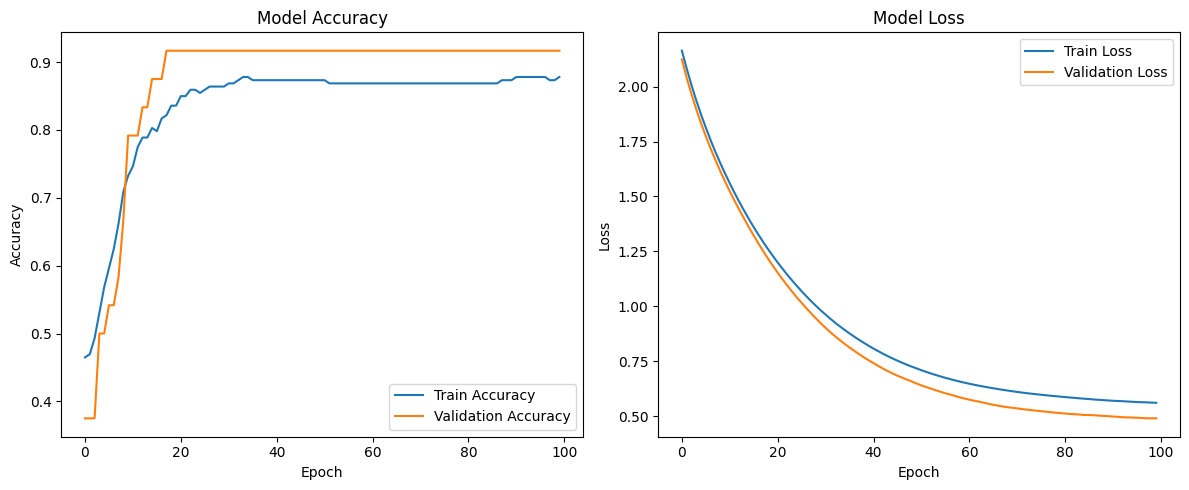

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import joblib  # For saving the scaler

# Load your CSV data
df = pd.read_csv("heart_cleveland_upload.csv")

# Separate features and target
X = df.drop("condition", axis=1)
y = df["condition"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

# Split into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

# L2 regularization value
lambda_value = 0.05

# Build model with L2 regularization
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(lambda_value)),
    Dense(8, activation='relu',
          kernel_regularizer=regularizers.l2(lambda_value)),
    Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l2(lambda_value))
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Save the model
model.save("heart_model.keras")
print("✅ Model saved as heart_model.keras")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
# Sample test data (1 row)
test_data = np.array([[52,1,0,170,194,0,2,169,0,1.9,1,0,2]])

# Apply the same scaler used on training data
test_data_scaled = scaler.transform(test_data)

# Predict
prediction = model.predict(test_data_scaled)

# Output
result = (prediction[0][0] > 0.5)
print(f"🔍 Prediction: {'Heart Disease Risk' if result else 'No Heart Disease Risk'}")
print(f"🧠 Model Confidence: {prediction[0][0]:.4f}")


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
🔍 Prediction: Heart Disease Risk
🧠 Model Confidence: 0.5210
